New repository from template

- A well documented Jupyter Notebook (see here for an example) containing the code you've written for this project and comments explaining it. This work will need to be pushed to your GitHub repository in order to submit your project. Do not push all the analysis... just the analysis that is relevant!
 - An organized README.md file in the GitHub repository that describes the contents of the repository. This file should be the source of information for navigating through the repository.
- A short Keynote/PowerPoint/Google Slides/Jupyter slides presentation giving a high-level overview of your methodology and recommendations for non-technical stakeholders. The duration of the presentation should be 10 minutes, then the discussion will continue for 5 minutes. Also put your slides (delivered as a PDF export) on Github to get a well-rounded project.
- Optional - A Python script for training the model, printing out the model statistics and saving the model. Look at this stackoverflow discussion on how to save a statsmodel.

In [449]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
import numpy as np

import plotly.graph_objects as go
#import plotly.figure_factory as ff
#import plotly.subplots as psp


from scipy import stats

%matplotlib inline

#Display all columns in following lists
pd.set_option('display.max_columns', None)

Exercise: 
Find results from the King County house prices dataset for a relevant Stakeholder.
Present the results in a nice format.

Stakeholder:
-  Thomas Hansen (Buyer)
    - 5 kids
    - no money
    - wants nice (social) neighbourhood
    - Timing?
    - Location?

Ideas for results:
- show map with relevant houses
- show an individual plot with all relevant data for each relevant house
- show list of relevant houses with relevant data, e.g. #bedrooms, #bathrooms, price, neighbourhood / location, timing, footage
- optional: grade, condition

In [450]:
#Read CSV file with relevant data
data = pd.read_csv('../data/King_County_House_prices_dataset.csv')

#Describe percentiles and other key values to get an overview of the data
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [451]:
# Stakeholder interests:
#5 kids: Find data for house with at least 4? bedrooms and 2? bathrooms
# No money: Get an overview of prices. Take data from cheapest X % of houses

#Defining key values according to above interests:
#First quartile of price is at 322,000. Filter data according to cheapest 25%.
#Third quartile of bedrooms is at 4. Filter data according to above 75% percentile.
#Third quartile of bathrooms is at 2.5. Filter data according to above 75% percentile.
#Third quartile of sqft_living is at 2550. Filter data according to above 75% percentile.

low25_bighouse = data.query('price <= price.describe()["25%"] and bedrooms >= bedrooms.describe()["75%"] and bathrooms >= bathrooms.describe()["75%"] and sqft_living >= sqft_living.describe()["75%"]')
low25_bighouse

#--> Only 66 houses are left

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
157,8731900200,8/7/2014,320000.0,4,2.75,2640,7500,1.0,0.0,0.0,3,8,1620,1020.0,1967,0.0,98023,47.3135,-122.369,1980,7875
232,9264902050,11/21/2014,315000.0,6,2.75,2940,7350,1.0,0.0,0.0,3,8,1780,1160.0,1978,0.0,98023,47.3103,-122.339,2120,8236
1255,3832711040,4/24/2015,321000.0,5,2.75,3030,7000,1.0,0.0,0.0,4,7,1540,1490.0,1978,NaN,98032,47.3661,-122.280,1790,7330
1853,6699000810,8/13/2014,315000.0,5,2.50,3220,5751,2.0,0.0,0.0,3,8,3220,0.0,2002,0.0,98042,47.3717,-122.104,2740,5500
1924,7316400070,9/25/2014,255000.0,5,3.75,2800,9900,1.0,0.0,0.0,3,7,2800,0.0,1964,NaN,98023,47.3190,-122.344,1700,13200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20377,3021059304,9/17/2014,300000.0,6,3.00,2744,9926,2.0,0.0,0.0,3,7,2744,0.0,2006,NaN,98002,47.2773,-122.216,2470,9926
20636,7883603648,5/22/2014,300000.0,5,2.50,2760,6000,2.0,0.0,0.0,3,8,2760,0.0,2006,0.0,98108,47.5289,-122.321,1360,6000
20912,53500760,12/8/2014,287000.0,4,2.50,2660,4082,2.0,NaN,0.0,3,7,2660,0.0,2010,0.0,98042,47.3414,-122.055,2390,4876
21139,4233800020,10/8/2014,270000.0,4,2.50,2701,5821,2.0,0.0,0.0,3,7,2701,0.0,2013,NaN,98092,47.2873,-122.177,2566,5843


**With the above defined key values, we have 475 of 21597 houses left.**

These 475 rows represent cheap and big houses (>= 2550 square feet) with 2.5 or more bathrooms and 4 or more bedrooms.

As next step we should try to define the next open question of our stakeholder:
1. What is a nice (and social) neighbourhood? (And to which location does this lead?)

The houses in the neighbourhood  are only defined through two values:
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

**This does not help with our question. We should try to create new data.**

- The word "social" indicates, that our stakeholder would like to have a higher quantity of houses in the area (people to talk to). 
Therefore we could add a column of "houses_in_zip" via checking the qty of rows in the same zipcode.

- The word "nice" indicates, that the local houses (houses_in_zip) should be of good quality. 
We could check this for all local houses via the "grade" column: overall grade given to the housing unit, based on King County grading system.
The higher the grade for nearby houses, the better (lowest is 3, highest is 13). Here we could use the median (or average grade) and add this as "median_zip_grade"

In [452]:
# Want nice (social) neighbourhood: Analyse neighbourhood data and get nice (social) data

#Calculate for every targeted house in low25_bighouse, how many houses (from overall data) have the same zip_code 
#(this represents the # of houses in the neighbourhood)

#Create a new list with zip_counter (how many houses are there per zipcode)
zipcounter = data.groupby('zipcode').count()
zipcounter.rename(columns={'id':'zip_counter'}, inplace=True)

#Save only column zip_counter 
zipcounter = zipcounter['zip_counter']
zipcounter

#Merge dataframes low25_bighouse and zipcounter on column "zipcode"
low25_bighouse_with_zipcounter = pd.merge(low25_bighouse, zipcounter, on="zipcode", how='left')

low25_bighouse_with_zipcounter

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_counter
0,8731900200,8/7/2014,320000.0,4,2.75,2640,7500,1.0,0.0,0.0,3,8,1620,1020.0,1967,0.0,98023,47.3135,-122.369,1980,7875,499
1,9264902050,11/21/2014,315000.0,6,2.75,2940,7350,1.0,0.0,0.0,3,8,1780,1160.0,1978,0.0,98023,47.3103,-122.339,2120,8236,499
2,3832711040,4/24/2015,321000.0,5,2.75,3030,7000,1.0,0.0,0.0,4,7,1540,1490.0,1978,NaN,98032,47.3661,-122.280,1790,7330,125
3,6699000810,8/13/2014,315000.0,5,2.50,3220,5751,2.0,0.0,0.0,3,8,3220,0.0,2002,0.0,98042,47.3717,-122.104,2740,5500,547
4,7316400070,9/25/2014,255000.0,5,3.75,2800,9900,1.0,0.0,0.0,3,7,2800,0.0,1964,NaN,98023,47.3190,-122.344,1700,13200,499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,3021059304,9/17/2014,300000.0,6,3.00,2744,9926,2.0,0.0,0.0,3,7,2744,0.0,2006,NaN,98002,47.2773,-122.216,2470,9926,199
62,7883603648,5/22/2014,300000.0,5,2.50,2760,6000,2.0,0.0,0.0,3,8,2760,0.0,2006,0.0,98108,47.5289,-122.321,1360,6000,186
63,53500760,12/8/2014,287000.0,4,2.50,2660,4082,2.0,NaN,0.0,3,7,2660,0.0,2010,0.0,98042,47.3414,-122.055,2390,4876,547
64,4233800020,10/8/2014,270000.0,4,2.50,2701,5821,2.0,0.0,0.0,3,7,2701,0.0,2013,NaN,98092,47.2873,-122.177,2566,5843,351


In [453]:
#Analyse zip_counter for the 66 houses. The more houses in the neighbourhood, the better
low25_bighouse_with_zipcounter.describe()['zip_counter']

count     66.000000
mean     382.348485
std      132.619698
min      125.000000
25%      268.250000
50%      361.000000
75%      499.000000
max      589.000000
Name: zip_counter, dtype: float64

In [454]:
#Take only houses with zipcounter above 75% percentile
low25_bighouse_with_zipcounter75 = low25_bighouse_with_zipcounter.query('zip_counter >= zip_counter.describe()["75%"]')

In [455]:
# Second part of:
#Want nice (social) neighbourhood: Analyse neighbourhood data and get nice (social) data
#Get the mean for grade same zip code

#Create a new list with zip_counter (how many houses are there per zipcode)
mean_grade = data.groupby('zipcode').mean()['grade']
mean_grade = round(mean_grade, 2)
#Merge dataframes low25_bighouse and zipcounter on column "zipcode"
low25_bighouse_zipcounter75_meangrade = pd.merge(low25_bighouse_with_zipcounter75, mean_grade, on="zipcode", how='left')
low25_bighouse_zipcounter75_meangrade.rename(columns={'grade_y':'grade_mean', 'grade_x':'grade'}, inplace=True)
low25_bighouse_zipcounter75_meangrade.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_counter,grade_mean
0,8731900200,8/7/2014,320000.0,4,2.75,2640,7500,1.0,0.0,0.0,3,8,1620,1020.0,1967,0.0,98023,47.3135,-122.369,1980,7875,499,7.58
1,9264902050,11/21/2014,315000.0,6,2.75,2940,7350,1.0,0.0,0.0,3,8,1780,1160.0,1978,0.0,98023,47.3103,-122.339,2120,8236,499,7.58
2,6699000810,8/13/2014,315000.0,5,2.50,3220,5751,2.0,0.0,0.0,3,8,3220,0.0,2002,0.0,98042,47.3717,-122.104,2740,5500,547,7.42
3,7316400070,9/25/2014,255000.0,5,3.75,2800,9900,1.0,0.0,0.0,3,7,2800,0.0,1964,NaN,98023,47.3190,-122.344,1700,13200,499,7.58
4,8732040090,5/6/2015,307450.0,4,2.75,2690,8874,1.0,0.0,0.0,3,8,1370,1320.0,1980,0.0,98023,47.3078,-122.383,1990,7875,499,7.58


In [456]:
# Third part of:
#Want nice (social) neighbourhood: Analyse neighbourhood data and get nice (social) data
#Get the mean for condition in same zip code

#Create a new list with zip_counter (how many houses are there per zipcode)
mean_condition = data.groupby('zipcode').mean()['condition']
mean_condition = round(mean_condition, 2)
#Merge dataframes low25_bighouse and zipcounter on column "zipcode"
low25_bighouse_zipcounter75_meangrade_meancondition = pd.merge(low25_bighouse_zipcounter75_meangrade, mean_condition, on="zipcode", how='left')
low25_bighouse_zipcounter75_meangrade_meancondition.rename(columns={'condition_y':'condition_mean', 'condition_x':'condition'}, inplace=True)
low25_bighouse_zipcounter75_meangrade_meancondition.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_counter,grade_mean,condition_mean
0,8731900200,8/7/2014,320000.0,4,2.75,2640,7500,1.0,0.0,0.0,3,8,1620,1020.0,1967,0.0,98023,47.3135,-122.369,1980,7875,499,7.58,3.39
1,9264902050,11/21/2014,315000.0,6,2.75,2940,7350,1.0,0.0,0.0,3,8,1780,1160.0,1978,0.0,98023,47.3103,-122.339,2120,8236,499,7.58,3.39
2,6699000810,8/13/2014,315000.0,5,2.50,3220,5751,2.0,0.0,0.0,3,8,3220,0.0,2002,0.0,98042,47.3717,-122.104,2740,5500,547,7.42,3.52
3,7316400070,9/25/2014,255000.0,5,3.75,2800,9900,1.0,0.0,0.0,3,7,2800,0.0,1964,NaN,98023,47.3190,-122.344,1700,13200,499,7.58,3.39
4,8732040090,5/6/2015,307450.0,4,2.75,2690,8874,1.0,0.0,0.0,3,8,1370,1320.0,1980,0.0,98023,47.3078,-122.383,1990,7875,499,7.58,3.39


In [457]:
#Plot the data of the retrieved houses
#Price, Grade, Grade_mean, Condition, Condition_mean, Bedrooms, Bathrooms, ...

final = low25_bighouse_zipcounter75_meangrade_meancondition[['id','price', 'grade', 'grade_mean','condition', 'condition_mean', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'zip_counter', 'lat', 'long']]

In [458]:
#Sort houses by relevancy. Reminder, Stakeholder is Thomas Hansen: 5 kids, no money, wants nice (social) neighbourhood, Timing?, Location?
# Most important is the size of the house to fit all 5 kids. Thus: 1. Bedrooms,
#Secondly, Thomas wants a nice neighbourhood: 2. grade_mean 3. condition_mean) 
#Thirdly, the price is important. I valued it lower at this point, because we have already filtered by price and only cheap houses are shown: 4. Price
final_sorted = final.sort_values('price').sort_values(by=['bedrooms', 'grade_mean', 'condition_mean'], ascending=False)

#Add a 'House'-Column sorted by relevancy
final_sorted.insert(0, 'House', range(1, 1 + len(final_sorted)))
top10 = final_sorted.head(10)
top10

,House,id,price,grade,grade_mean,condition,condition_mean,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode,zip_counter,lat,long
1,1,9264902050,315000.0,8,7.58,3,3.39,6,2.75,2940,7350,1.0,98023,499,47.3103,-122.339
10,2,1022059123,250000.0,7,7.42,4,3.52,6,2.50,2590,10890,1.0,98042,547,47.4126,-122.165
24,3,7896300592,303500.0,8,6.98,3,3.35,6,4.50,3390,7200,2.0,98118,507,47.5205,-122.288
3,4,7316400070,255000.0,7,7.58,3,3.39,5,3.75,2800,9900,1.0,98023,499,47.3190,-122.344
19,5,8731960050,302300.0,8,7.58,4,3.39,5,2.75,3130,9450,1.0,98023,499,47.3099,-122.384
12,6,9264911210,320000.0,8,7.58,3,3.39,5,3.00,2970,7000,1.0,98023,499,47.3079,-122.341
2,7,6699000810,315000.0,8,7.42,3,3.52,5,2.50,3220,5751,2.0,98042,547,47.3717,-122.104
15,8,1156000250,320000.0,8,7.42,4,3.52,5,2.50,3020,21441,1.0,98042,547,47.3392,-122.131
9,9,5416500840,320000.0,8,7.60,3,3.19,4,2.50,2570,4865,2.0,98038,589,47.3588,-122.038
17,10,8731981640,277500.0,8,7.58,3,3.39,4,2.50,2550,7500,1.0,98023,499,47.3165,-122.386


In [459]:
#Create a score system according to the data

top10 = final_sorted.head(10)
top10

#1. Sorted by all values as overall housescore, mainly bedrooms and bathrooms
top10 = top10.sort_values('price').sort_values(by=['bedrooms', 'grade_mean', 'condition_mean'])
top10.insert(0, 'housescore', range(1, 1 + len(top10)))


#2. Sorted by grade and grade_mean and overall Housescore
top10 = top10.sort_values(by=['grade', 'grade_mean', 'housescore'], ascending=True)
top10.insert(0, 'gradescore', range(1, 1 + len(top10)))


#3. Sorted by condition and condition_mean and overall Housescore
top10 = top10.sort_values(by=['condition', 'condition_mean', 'housescore'], ascending=True)
top10.insert(0, 'conditionscore', range(1, 1 + len(top10)))


#4. Sorted by price
top10 = top10.sort_values(by=['price'], ascending=False)
top10.insert(0, 'pricescore', range(1, 1 + len(top10)))

#Calculate overall Score with the four values and add to top10 list
top10.eval('Score = (housescore + gradescore + conditionscore + pricescore)/4', inplace = True)
top10.sort_values('Score', ascending=False)


,pricescore,conditionscore,gradescore,housescore,House,id,price,grade,grade_mean,condition,condition_mean,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode,zip_counter,lat,long,Score
10,10,10,1,9,2,1022059123,250000.0,7,7.42,4,3.52,6,2.50,2590,10890,1.0,98042,547,47.4126,-122.165,7.50
1,4,6,9,10,1,9264902050,315000.0,8,7.58,3,3.39,6,2.75,2940,7350,1.0,98023,499,47.3103,-122.339,7.25
19,7,8,7,6,5,8731960050,302300.0,8,7.58,4,3.39,5,2.75,3130,9450,1.0,98023,499,47.3099,-122.384,7.00
12,2,5,8,7,6,9264911210,320000.0,8,7.58,3,3.39,5,3.00,2970,7000,1.0,98023,499,47.3079,-122.341,5.50
15,3,9,5,4,8,1156000250,320000.0,8,7.42,4,3.52,5,2.50,3020,21441,1.0,98042,547,47.3392,-122.131,5.25
3,9,4,2,5,4,7316400070,255000.0,7,7.58,3,3.39,5,3.75,2800,9900,1.0,98023,499,47.3190,-122.344,5.00
2,5,7,4,3,7,6699000810,315000.0,8,7.42,3,3.52,5,2.50,3220,5751,2.0,98042,547,47.3717,-122.104,4.75
24,6,2,3,8,3,7896300592,303500.0,8,6.98,3,3.35,6,4.50,3390,7200,2.0,98118,507,47.5205,-122.288,4.75
17,8,3,6,1,10,8731981640,277500.0,8,7.58,3,3.39,4,2.50,2550,7500,1.0,98023,499,47.3165,-122.386,4.50
9,1,1,10,2,9,5416500840,320000.0,8,7.60,3,3.19,4,2.50,2570,4865,2.0,98038,589,47.3588,-122.038,3.50


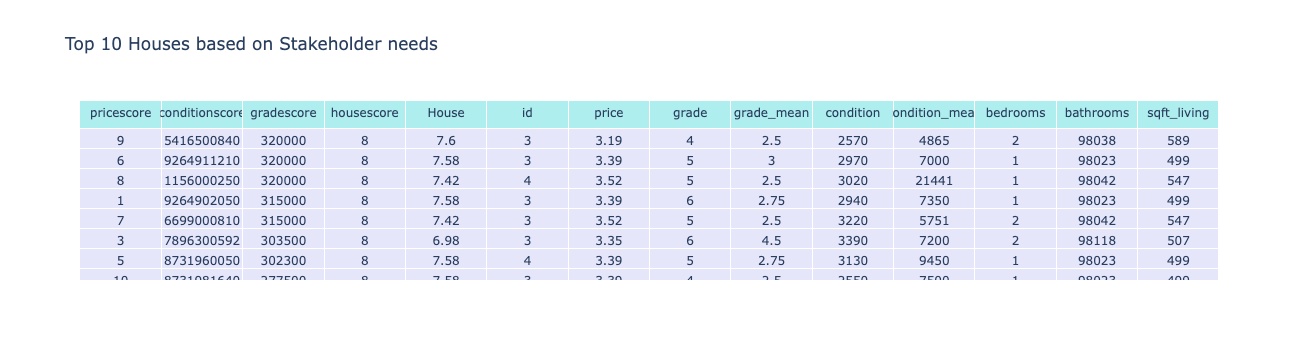

In [460]:

fig = go.Figure(data=[go.Table(
    header=dict(values=list(top10.columns[0:14]),
                fill_color='paleturquoise',
                align='center'),
    cells=dict(values=[top10.House, top10.id, top10.price, top10.grade, 
                       top10.grade_mean, top10.condition, top10.condition_mean,
                      top10.bedrooms, top10.bathrooms, top10.sqft_living, 
                       top10.sqft_lot, top10.floors, top10.zipcode, top10.zip_counter,],
               fill_color='lavender',
               align='center'))
])
fig.update_layout(title='Top 10 Houses based on Stakeholder needs')
fig.show()

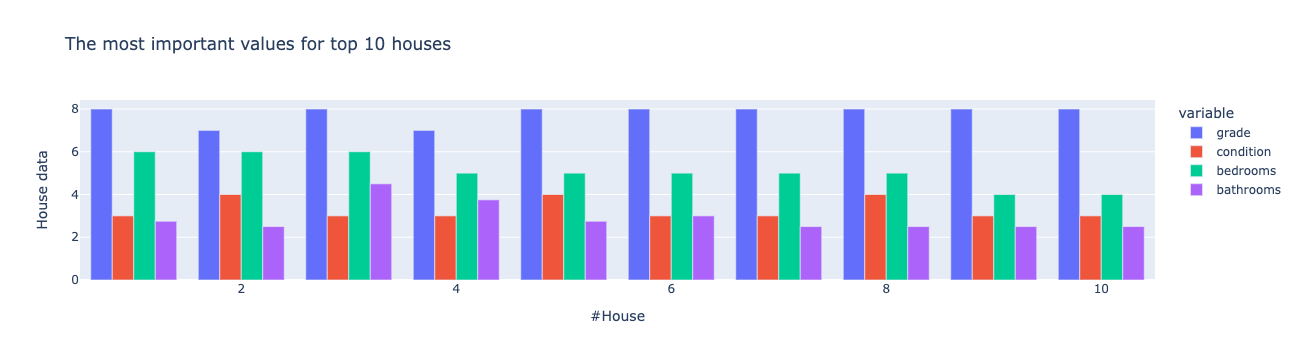

In [461]:
#Plot House data from top5
fig = px.bar(top10, x="House", y=["grade", "condition", "bedrooms", "bathrooms"], barmode='group',
             
             labels={
                     "House": "#House",
                     "value": "House data"},
             
             title="The most important values for top 10 houses")      
fig.show()


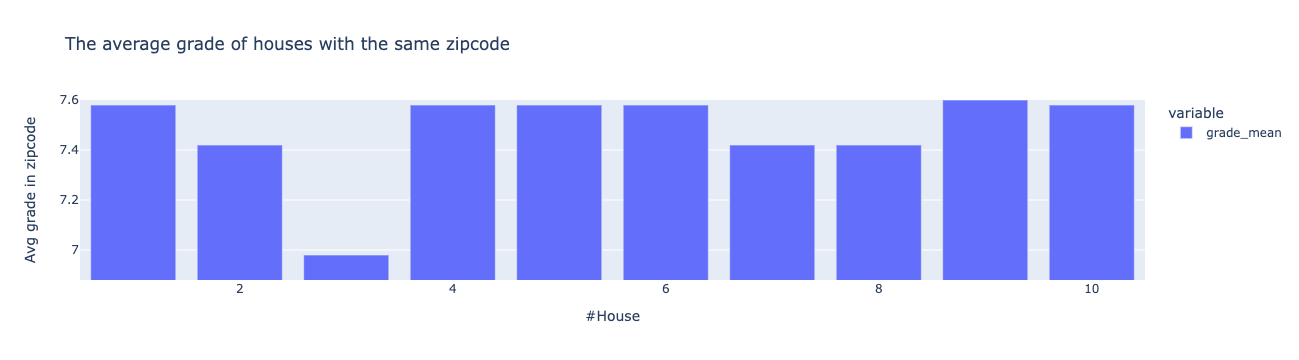

In [462]:
#Plot Neighbourhood data from top10
#mingrade = top10["grade_mean"].describe("min")
mingrade = top10['grade_mean'].describe()["min"]- 0.1

fig = px.bar(top10, x="House", y=["grade_mean"],
             
             labels={
                     "House": "#House",
                     "value": "Avg grade in zipcode"},
             
             title="The average grade of houses with the same zipcode"
             
    )
fig.update_layout(yaxis_range=[mingrade, top10['grade_mean'] .describe()["max"]])
fig.show()

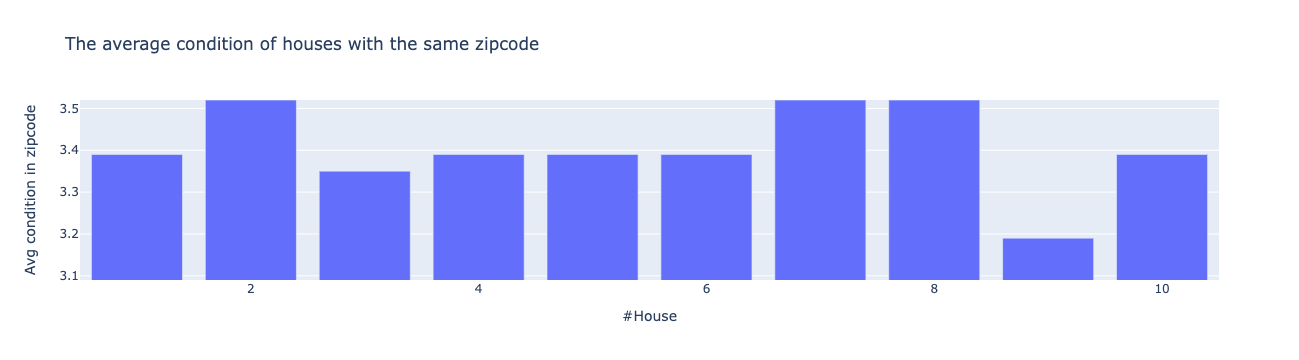

In [463]:
#Plot Neighbourhood data from top5

#Setting a variable a little less than minimum of condition mean
mincondition = top10['condition_mean'].describe()["min"]- 0.1

fig = px.bar(top10, x="House", y=["condition_mean"], 
             
             labels={
                     "House": "#House",
                     "value": "Avg condition in zipcode"},
             
             title="The average condition of houses with the same zipcode",
             
    
            )  

#Update Y-axis range to Minimum and Maximum of Condition Mean
fig.update_layout(yaxis_range=[mincondition, top10['condition_mean'].describe()["max"]], 
                               showlegend=False)

fig.show()

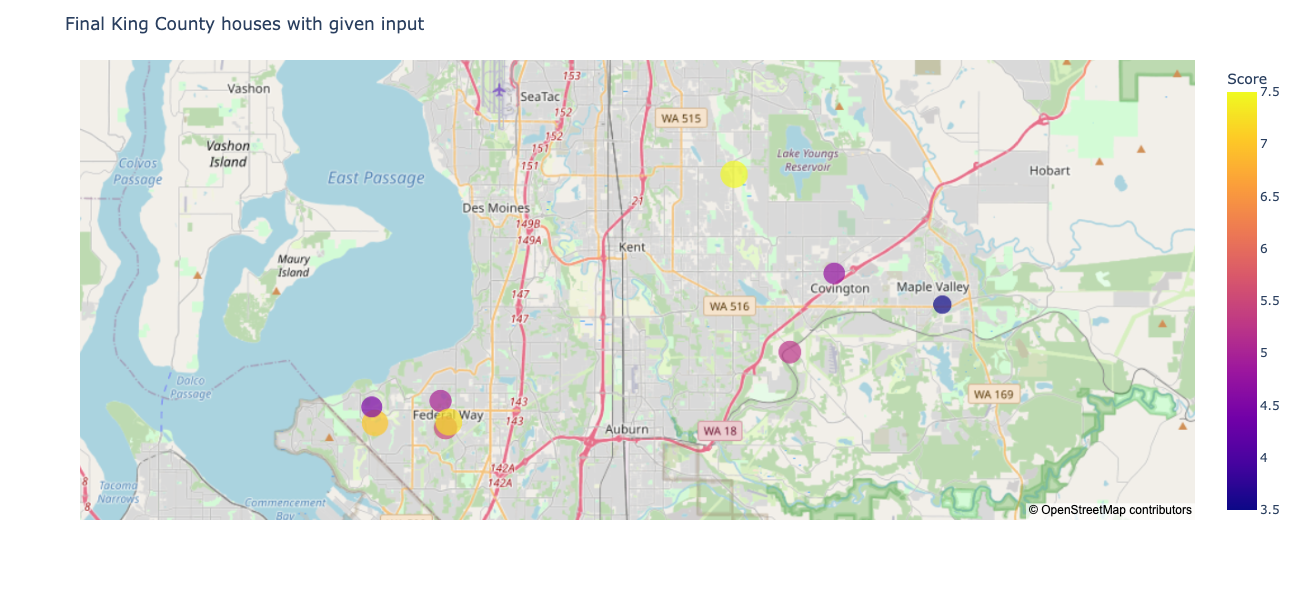

In [466]:
# map created with plotly for final dataset
fig = px.scatter_mapbox(top10, lat="lat", lon="long", hover_name="id", 
                        hover_data={"lat":False, 'long':False, "price":True, "grade":True, "condition":True, "bedrooms":True, "bathrooms":True, 
                                 "floors":True, "sqft_living":True, "sqft_lot":True, }, 
                        width=1000, height=600, zoom=9.3, size="Score", color='Score')
fig.update_layout(mapbox_style="open-street-map", title="Final King County houses with given input")
fig.update_geos(fitbounds="locations")
fig.show()

In [2]:
#Timing?

#Save day, month and year in separate columns
timing = grading
timing['date']=pd.to_datetime(timing['date'],format='%m/%d/%Y')
timing['day_sold'] = timing['date'].dt.day
timing['month_sold'] = timing['date'].dt.month
timing['year_sold'] = timing['date'].dt.year

#Plot the dates vs the price
px.scatter(new_house, x='day_sold', y='price')
px.scatter(new_house, x='month_sold', y='price')
px.scatter(new_house, x='year_sold', y='price')

NameError: name 'grading' is not defined